In [100]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, mean_absolute_error 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.utils.validation import check_is_fitted
import warnings
warnings.filterwarnings("ignore")


# 1.0 Prepare Data


# 1.1 Import Data

In [101]:
df = pd.read_csv("titanic.csv")

In [102]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [103]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [104]:
df["Survived"].nunique()

2

In [105]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [106]:
df.shape

(891, 12)

In [107]:
# Checking the value count 
print(df["Survived"].value_counts())

0    549
1    342
Name: Survived, dtype: int64


In [108]:
# To drop the Cabin column due to high percentage of missing value using drop method 
df.drop(columns = ["Cabin"], axis = 1, inplace = True)

In [109]:
df.dropna(inplace = True)

In [110]:
# To fill the null value for this column using the fillna method 
df["Age"].fillna(df["Age"].median(), inplace = True)

In [111]:
# Checking the percentage of null values
df.isnull().sum() / len(df)

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

# Exploratory Data Analysis 

In [112]:
# Create Correlation Matrix
correlation = df.select_dtypes("number").drop(columns = "Survived").corr()
correlation

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.035609,0.033681,-0.082704,-0.011672,0.009655
Pclass,-0.035609,1.000000,-0.365902,0.065187,0.023666,-0.552893
Age,0.033681,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.082704,0.065187,-0.307351,1.000000,0.383338,0.139860
Parch,-0.011672,0.023666,-0.187896,0.383338,1.000000,0.206624
Fare,0.009655,-0.552893,0.093143,0.139860,0.206624,1.000000


<AxesSubplot:>

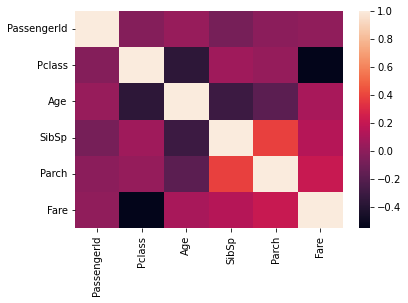

In [113]:
sns.heatmap(correlation)

In [114]:
# Checking for multicollinarity in the columns
col = df["Survived"].corr(df["SibSp"])

In [115]:
# dropping multicollinarity in the column
df.drop(columns = ["SibSp"],axis = 1,  inplace = True)

In [116]:
# To check the information of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   Parch        712 non-null    int64  
 7   Ticket       712 non-null    object 
 8   Fare         712 non-null    float64
 9   Embarked     712 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 61.2+ KB


In [117]:
df.shape

(712, 10)

In [118]:
df["Survived"].nunique()

2

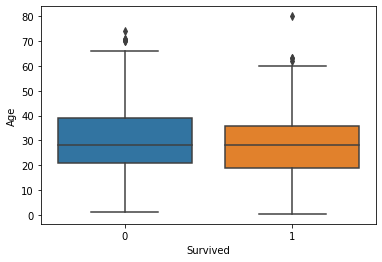

In [119]:
sns.boxplot(x = "Survived", y = "Age", data = df);

In [120]:
df["Sex"].value_counts()

male      453
female    259
Name: Sex, dtype: int64

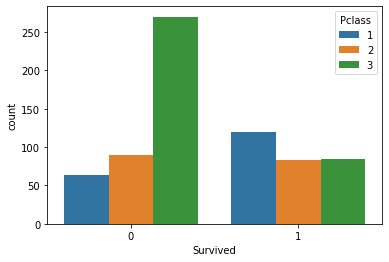

In [121]:
sns.countplot(x = "Survived", hue = "Pclass", data = df);

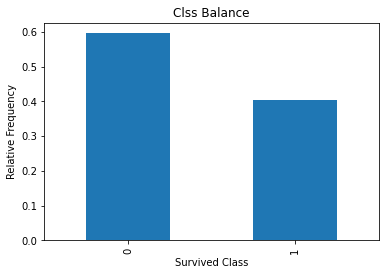

In [122]:
# plot value counts of "Survived"
df["Survived"].value_counts(normalize= True).plot(
    kind = "bar", xlabel = "Survived Class", ylabel = "Relative Frequency", title = "Clss Balance"
);

In [123]:
# creating two variables, majority class and minority class to 
#store normalized value counts for the two class in "Survived"
majority_class, minority_class = df["Survived"].value_counts(normalize= True)
print(majority_class, minority_class)

0.5955056179775281 0.4044943820224719


In [124]:
# creating a pivote table for the "Pclass to see if the class influences the survival rate"
Pclass_pivot = pd.pivot_table(
  df, index = "Pclass", values = "Survived", aggfunc= np.mean
).sort_values(by = "Survived")

Pclass_pivot

,Survived
Pclass,
3,0.239437
2,0.479769
1,0.652174


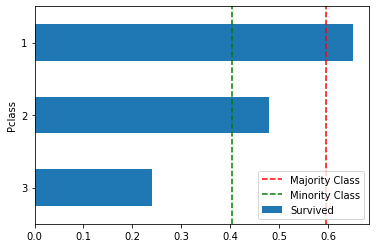

In [125]:
# bar chart of Pclass pivot compare to the proportion of the Majority and Minority classes 
Pclass_pivot.plot(kind = "barh", legend = None)
plt.axvline(
majority_class, linestyle = "--", color = "red", label = "Majority Class"
)
plt.axvline(
minority_class, linestyle = "--", color = "green", label = "Minority Class"
)
plt.legend(loc = "lower right");

In [126]:
# checking for high and low cardinality categorical features 
df.select_dtypes("object").nunique()

Name        712
Sex           2
Ticket      541
Embarked      3
dtype: int64

In [127]:
# dropping "Name and " Ticket features due to high cardinality
df.drop(columns = ["Name", "Ticket"], axis = 1, inplace = True)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Sex          712 non-null    object 
 4   Age          712 non-null    float64
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   Embarked     712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 66.2+ KB


In [129]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
0,1,0,3,male,22.0,0,7.2500,S
1,2,1,1,female,38.0,0,71.2833,C
2,3,1,3,female,26.0,0,7.9250,S
3,4,1,1,female,35.0,0,53.1000,S
4,5,0,3,male,35.0,0,8.0500,S


# Split

In [130]:
target = "Survived"
features = ["PassengerId", "Pclass", "Sex", "Age", "Parch", "Fare", "Embarked"]
y = df[target]
X = df[features]

# Build Model

In [131]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (569, 7)
X_test shape: (143, 7)
y_train shape: (569,)
y_test shape: (143,)


In [132]:
# calculate baseline accuracy score
acc_baseline = y_train.value_counts(normalize= True).max()
print("Baseline Accuracy: ", round(acc_baseline, 2))

Baseline Accuracy:  0.6


# Iterate 

In [133]:
model = make_pipeline(
    OneHotEncoder(),
    LogisticRegression()
)

# fit the model to training data
model.fit(X_train, y_train )

Pipeline(steps=[('onehotencoder', OneHotEncoder()),
                ('logisticregression', LogisticRegression())])

# Evaluate 

In [134]:
accuracy_training = accuracy_score(y_train, model.predict(X_train))
accuracy_training

0.9349736379613357

# Communicate

In [135]:
model.predict(X_train)[:5]

array([1, 1, 0, 0, 1], dtype=int64)

In [136]:
# Generating probability using trained model in scikit
y_train_pred_proba = model.predict_proba(X_train)
print(y_train_pred_proba[:5])

[[0.15967044 0.84032956]
 [0.0884259  0.9115741 ]
 [0.89611442 0.10388558]
 [0.69263923 0.30736077]
 [0.04898418 0.95101582]]


In [137]:
# Extracting feature names and importance from the model
features = model.named_steps["onehotencoder"].get_feature_names(["PassengerId","Pclass", "Sex", "Age", "Parch", "Fare", "Embarked"])
importance = model.named_steps["logisticregression"].coef_[0]

In [138]:
odds_ratio = pd.Series(np.exp(importance), index = features).sort_values()
odds_ratio.head()

Sex_male          0.233903
Fare_31.275       0.291959
Pclass_3          0.348689
Fare_21.075       0.354032
PassengerId_42    0.445349
dtype: float64

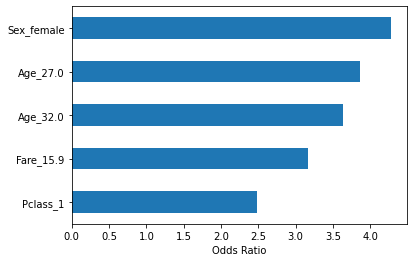

In [94]:
# Creating horizontal bar chart with 5 largest coefficient from the odds ratio
odds_ratio.tail().plot(kind = "barh")
plt.xlabel("Odds Ratio");

<AxesSubplot:>

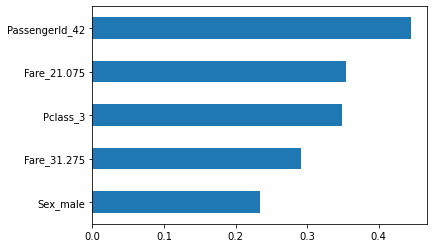

In [144]:
# Creating horizontal bar chart with 5 largest coefficient from the odds ratio
odds_ratio.head().plot(kind = "barh")
plt.xlabel("Odds Ratio");